El RMS Titanic fue en su momento el mayor barco de pasajeros del mundo, hundi ́endose en su viaje
inaugural de Southampton a Nueva York en el a ̃no 1912. En el evento fallecieron 1514 de las 2223
personas que iban a bordo, entre tripulaci ́on y pasajeros.
En  el  presente  pr ́actico  se  trabajar ́a  con  el  conjunto  de  datos  titanic,  que  figura  en  el  data.frame
titanic.txt. El conjunto de datos es un cl ́asicos de las competencias de ”Machine Learning“, donde se
busca determinar un mecanismo de clasificaci ́on que, en funci ́on de diversos variables de cada pasajero,
prediga si el pasajero sobrevivi ́o o no a la cat ́astrofe. Las variables del conjunto de datos son:
survival: supervivencia (0 No, 1 S ́ı).
pclass: clase del pasajero (1,2 o 3).
sex: sexo del pasajero (”male“, ”female“).
age: edad del pasajero.
sibsp: cantidad de hermanos y c ́onyuges (totalizado) embarcados (n ́umero entero).
parch: cantidad de padres e hijos (totalizado) embarcados (n ́umero entero).
ticket: c ́odigo del boleto (texto).
fare: tarifa del pasaje (n ́umero real).
embarked: puerto de embarque (S= Southampton, Q=Queenstown, C = Cherbourg)
Los datos contienen 1028 pasajeros y algunas variables contienen respuestas faltantes.

1)  Borrar todos los objetos existentes en el entorno de trabajo y establecer directorio de trabajo.
2)  Leer  el  conjunto  de  titanic.txt  teniendo  en  cuenta  que  en  la  primera  l ́ınea  del  archivo  figura
el nombre de las variables y los datos se encuentran separados por tabulaciones (sep=“
\
t”), y
as ́ıgnelo al data.frame titanic.
3)  Inspeccionar los primeros casos del archivo y los  ́ultimos.
4)  Abrir con el editor al data.frame e inspeccionar el archivo.

In [58]:
titanic <- read.table("titanic.txt", sep = "\t", header = T, as.is = T, dec = ",")
str(titanic)
#titanic$fare <- as.numeric(gsub(",", ".", as.character(titanic$fare)))
head(titanic)
tail(titanic)
fix(titanic)


'data.frame':	1309 obs. of  9 variables:
 $ pclass  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: int  1 1 0 0 0 1 1 0 1 0 ...
 $ sex     : chr  "female" "male" "female" "male" ...
 $ age     : num  29 0.917 2 30 25 ...
 $ sibsp   : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : chr  "24160" "113781" "113781" "113781" ...
 $ fare    : num  211 152 152 152 152 ...
 $ embarked: chr  "S" "S" "S" "S" ...


pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
1,1,female,29.0000,0,0,24160,211.3375,S
1,1,male,0.9167,1,2,113781,151.5500,S
1,0,female,2.0000,1,2,113781,151.5500,S
1,0,male,30.0000,1,2,113781,151.5500,S
1,0,female,25.0000,1,2,113781,151.5500,S
1,1,male,48.0000,0,0,19952,26.5500,S


,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
1304,3,0,male,NA,0,0,2627,14.4583,C
1305,3,0,female,14.5,1,0,2665,14.4542,C
1306,3,0,female,NA,1,0,2665,14.4542,C
1307,3,0,male,26.5,0,0,2656,7.2250,C
1308,3,0,male,27.0,0,0,2670,7.2250,C
1309,3,0,male,29.0,0,0,315082,7.8750,S


5) Establecer el n ́umero de variables y de casos.

In [57]:
dim(titanic)


[1] 1309    9

6) Realizar un attach de titanic

In [13]:
attach(titanic)

In [15]:
search()

[1] ".GlobalEnv"        "titanic"           "titanic"          
 [4] "titanic"           "jupyter:irkernel"  "jupyter:irkernel" 
 [7] "package:stats"     "package:graphics"  "package:grDevices"
[10] "package:utils"     "package:datasets"  "package:methods"  
[13] "Autoloads"         "package:base"

7)  Inspeccionar los nombres de las variables de titanic e identificar de qu ́e tipo de variable se trata
cada una de ellas.

In [17]:
names(titanic)
str(titanic)

[1] "pclass"   "survived" "sex"      "age"      "sibsp"    "parch"    "ticket"  
[8] "fare"     "embarked"

'data.frame':	1309 obs. of  9 variables:
 $ pclass  : num  1 1 1 1 1 1 1 1 1 1 ...
 $ survived: num  1 1 0 0 0 1 1 0 1 0 ...
 $ sex     : Factor w/ 2 levels "female","male": 1 2 1 2 1 2 1 2 1 2 ...
 $ age     : Factor w/ 99 levels "","0,1667","0,3333",..: 39 8 23 41 33 67 86 55 73 94 ...
 $ sibsp   : num  0 1 1 1 1 0 1 0 2 0 ...
 $ parch   : num  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket  : Factor w/ 929 levels "110152","110413",..: 188 50 50 50 50 125 93 16 77 826 ...
 $ fare    : Factor w/ 282 levels "","0,0000","10,1708",..: 79 58 58 58 58 103 236 2 157 153 ...
 $ embarked: Factor w/ 4 levels "","C","Q","S": 4 4 4 4 4 4 4 4 4 2 ...


8) Calcule la chance de sobrevivir siendo hombre. Calcule la chance de sobrevivir siendo mujer.

In [20]:
hombres <- titanic[titanic$sex == "male", ]
mujeres <- titanic[titanic$sex == "female", ]
sum(hombres$survived == 1)/nrow(hombres)
sum(mujeres$survived == 1)/nrow(mujeres)

[1] 0.1909846

[1] 0.7274678

9) Cree que el tipo de ticket del pasajero (clase de cabina) esta asociado con su supervivencia?

In [31]:
sum(titanic$survived[titanic$pclass == 1])/sum(titanic$pclass == 1)
sum(titanic$survived[titanic$pclass == 2])/sum(titanic$pclass == 1)
sum(titanic$survived[titanic$pclass == 3])/sum(titanic$pclass == 1)

[1] 0.619195

[1] 0.3684211

[1] 0.5603715

10)  Estudie la distribuci ́on de las tarifas. Que observa? Le parece razonable suponer que la variable
tarifa  tenga  distribuci ́on  normal?  Calcule  la  media  y  la  mediana.  Puede  decidir  de  antemano
qui ́en es mas grande si la media o la mediana?

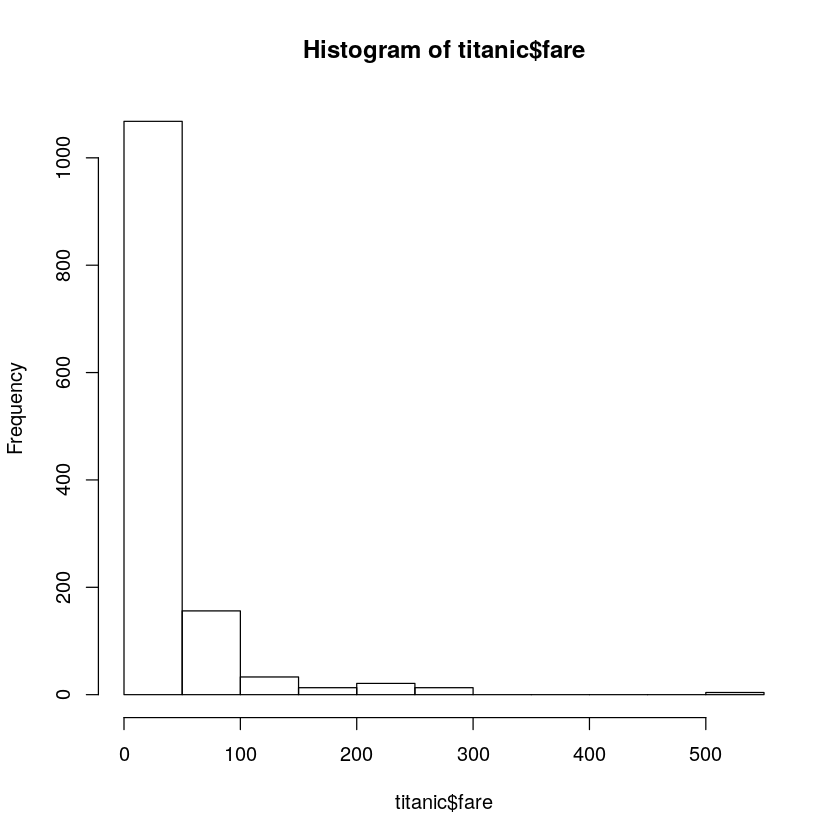

In [59]:
hist(titanic$fare)
#hist(as.numeric(gsub(",", ".", as.character(titanic$fare))), breaks = 30)
#mean(as.numeric(gsub(",", ".", as.character(titanic$fare))), na.rm = T)
#median(as.numeric(gsub(",", ".", as.character(titanic$fare))), na.rm = T)


11)  Estudie la relaci ́on entre tarifa y clase y entre edad y clase.

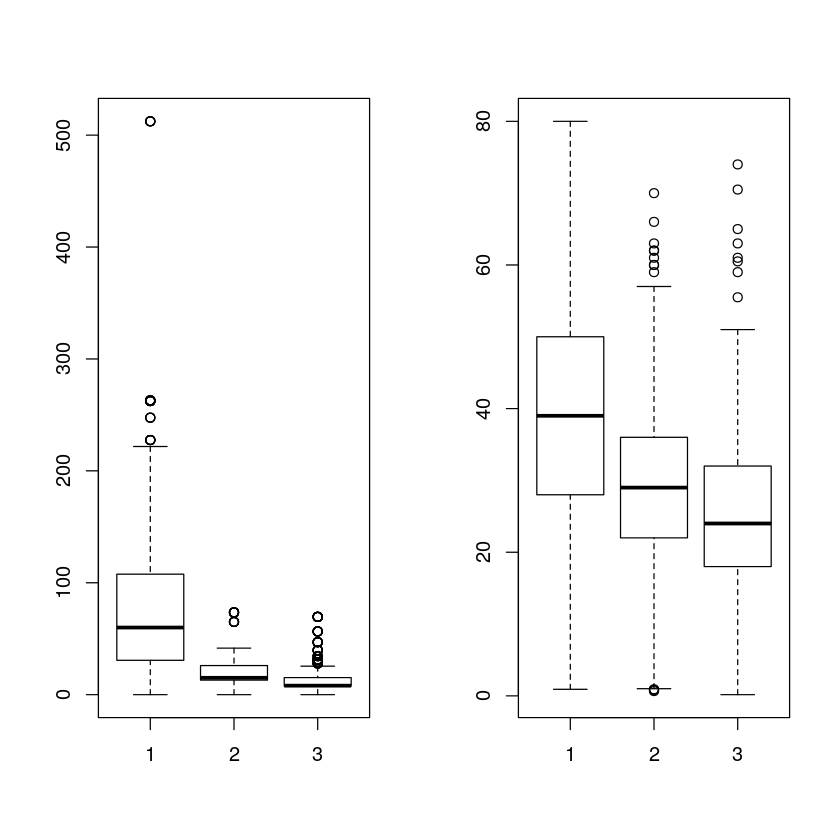

In [62]:
par(mfrow=c(1,2))
boxplot(titanic$fare ~ titanic$pclass)
boxplot(titanic$age ~ titanic$pclass)


12)  Respecto a la relaci ́on entre la edad y la tarifa podemos pensar que las personas m ́as j ́ovenes
ten ́ıan menos dinero y por ende compraron los tiquetes m ́as baratos. Puede confirmar esto en
base a los datos?

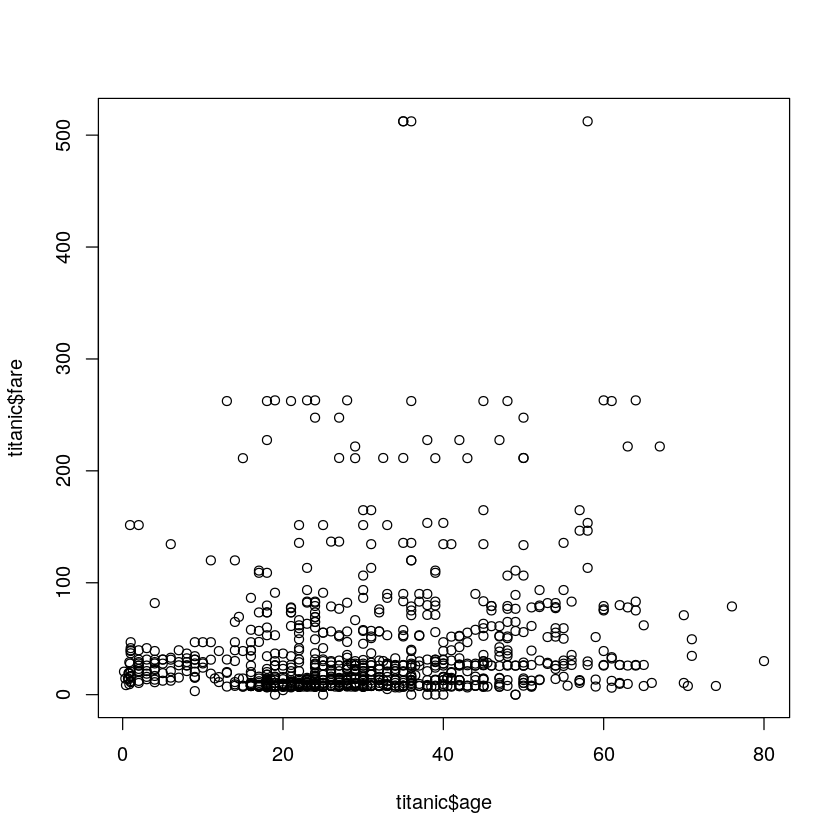

In [64]:
plot(titanic$age, titanic$fare)